## Convolutional Neural Network



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1bkcr55sW6BrcgKVPEGTb3vvhpnrklKKq?usp=sharing

Fill in cells below and fit neural networks for solving the binary classification task.

**Requirement**
- Python, Pytorch (Must), and all other necessary libraries
- **Just don't cheat, Thanks!**
- Sample output is to help you understand the task, and get an idea of what you have to do

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor


In [3]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms


The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [5]:
# Research on how to load google drive files into colab if you are using colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

img_width, img_height, channels = 150, 150, 3 # you can try different sizes

transform = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor()
])
main = '/content/drive/My Drive/Cats_and_Dogs'
train = datasets.ImageFolder(root=main + '/train', transform=transform)
val = datasets.ImageFolder(root=main + '/val', transform=transform)
test = datasets.ImageFolder(root=main + '/test', transform=transform)

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 16
# train set size
nb_train_samples = 20000
# validation set size
nb_validation_samples = 2490
# test set size
nb_test_samples = 2500

train_steps_per_epoch = nb_train_samples // batch_size
val_steps_per_epoch = nb_validation_samples // batch_size


train_dataloader = DataLoader(train, batch_size=batch_size, shuffle=True, num_workers = 4)
val_dataloader = DataLoader(val, batch_size=batch_size, shuffle=False, num_workers = 4)
test_dataloader = DataLoader(test, batch_size=batch_size, shuffle=False)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## Prepare the data.

Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. flatten, which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use Dropout (0.5) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.


In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
import torch
import torch.nn as nn

class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()

        # Layer 1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding = 1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride = 2)

        # Layer 2
        self.conv2 = nn.Conv2d(16,32,3,1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(2,2)

        # Layer 3
        self.conv3 = nn.Conv2d(32,64,3,1)
        self.relu3 = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(2,2)

        # Flatten
        self.flatten = nn.Flatten()

        # Fully connected layer
        self.fc1 = nn.Linear(64 * 17 * 17, 64)
        self.relu4 = nn.ReLU()

        # Dropout layer
        self.dropout = nn.Dropout(0.5)

        # Fully connected layer
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Layer 1
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)

        # Layer 2
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)

        # Layer 3
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.maxpool3(x)

        x = x.view(x.size(0), -1)

        # Fully connected layer 1
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.dropout(x)

        # Fully Connected layer 2
        x = self.fc2(x)
        x = self.sigmoid(x)

        return x

model = CNNModel()

In [ ]:
!pip install tqdm
from tqdm import tqdm
import numpy as np

Training Progress:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1/20
Epoch 1/20 - Batch 1/1250
Epoch 1/20 - Batch 2/1250
Epoch 1/20 - Batch 3/1250
Epoch 1/20 - Batch 4/1250
Epoch 1/20 - Batch 5/1250
Epoch 1/20 - Batch 6/1250
Epoch 1/20 - Batch 7/1250
Epoch 1/20 - Batch 8/1250
Epoch 1/20 - Batch 9/1250
Epoch 1/20 - Batch 10/1250
Epoch 1/20 - Batch 11/1250
Epoch 1/20 - Batch 12/1250
Epoch 1/20 - Batch 13/1250
Epoch 1/20 - Batch 14/1250
Epoch 1/20 - Batch 15/1250
Epoch 1/20 - Batch 16/1250
Epoch 1/20 - Batch 17/1250
Epoch 1/20 - Batch 18/1250
Epoch 1/20 - Batch 19/1250
Epoch 1/20 - Batch 20/1250
Epoch 1/20 - Batch 21/1250
Epoch 1/20 - Batch 22/1250
Epoch 1/20 - Batch 23/1250
Epoch 1/20 - Batch 24/1250
Epoch 1/20 - Batch 25/1250
Epoch 1/20 - Batch 26/1250
Epoch 1/20 - Batch 27/1250
Epoch 1/20 - Batch 28/1250
Epoch 1/20 - Batch 29/1250
Epoch 1/20 - Batch 30/1250
Epoch 1/20 - Batch 31/1250
Epoch 1/20 - Batch 32/1250
Epoch 1/20 - Batch 33/1250
Epoch 1/20 - Batch 34/1250
Epoch 1/20 - Batch 35/1250
Epoch 1/20 - Batch 36/1250
Epoch 1/20 - Batch 37/1250

Training Progress:   5%|▌         | 1/20 [09:58<3:09:27, 598.31s/it]

Epoch 1/20
Training Loss: 0.5880 - Training Accuracy: 0.6909
Validation Loss: 0.5762 - Validation Accuracy: 0.6739

Epoch 2/20
Epoch 2/20 - Batch 1/1250
Epoch 2/20 - Batch 2/1250
Epoch 2/20 - Batch 3/1250
Epoch 2/20 - Batch 4/1250
Epoch 2/20 - Batch 5/1250
Epoch 2/20 - Batch 6/1250
Epoch 2/20 - Batch 7/1250
Epoch 2/20 - Batch 8/1250
Epoch 2/20 - Batch 9/1250
Epoch 2/20 - Batch 10/1250
Epoch 2/20 - Batch 11/1250
Epoch 2/20 - Batch 12/1250
Epoch 2/20 - Batch 13/1250
Epoch 2/20 - Batch 14/1250
Epoch 2/20 - Batch 15/1250
Epoch 2/20 - Batch 16/1250
Epoch 2/20 - Batch 17/1250
Epoch 2/20 - Batch 18/1250
Epoch 2/20 - Batch 19/1250
Epoch 2/20 - Batch 20/1250
Epoch 2/20 - Batch 21/1250
Epoch 2/20 - Batch 22/1250
Epoch 2/20 - Batch 23/1250
Epoch 2/20 - Batch 24/1250
Epoch 2/20 - Batch 25/1250
Epoch 2/20 - Batch 26/1250
Epoch 2/20 - Batch 27/1250
Epoch 2/20 - Batch 28/1250
Epoch 2/20 - Batch 29/1250
Epoch 2/20 - Batch 30/1250
Epoch 2/20 - Batch 31/1250
Epoch 2/20 - Batch 32/1250
Epoch 2/20 - Batch

Training Progress:  10%|█         | 2/20 [17:55<2:38:11, 527.32s/it]

Epoch 2/20
Training Loss: 0.5375 - Training Accuracy: 0.7288
Validation Loss: 0.5050 - Validation Accuracy: 0.7542

Epoch 3/20
Epoch 3/20 - Batch 1/1250
Epoch 3/20 - Batch 2/1250
Epoch 3/20 - Batch 3/1250
Epoch 3/20 - Batch 4/1250
Epoch 3/20 - Batch 5/1250
Epoch 3/20 - Batch 6/1250
Epoch 3/20 - Batch 7/1250
Epoch 3/20 - Batch 8/1250
Epoch 3/20 - Batch 9/1250
Epoch 3/20 - Batch 10/1250
Epoch 3/20 - Batch 11/1250
Epoch 3/20 - Batch 12/1250
Epoch 3/20 - Batch 13/1250
Epoch 3/20 - Batch 14/1250
Epoch 3/20 - Batch 15/1250
Epoch 3/20 - Batch 16/1250
Epoch 3/20 - Batch 17/1250
Epoch 3/20 - Batch 18/1250
Epoch 3/20 - Batch 19/1250
Epoch 3/20 - Batch 20/1250
Epoch 3/20 - Batch 21/1250
Epoch 3/20 - Batch 22/1250
Epoch 3/20 - Batch 23/1250
Epoch 3/20 - Batch 24/1250
Epoch 3/20 - Batch 25/1250
Epoch 3/20 - Batch 26/1250
Epoch 3/20 - Batch 27/1250
Epoch 3/20 - Batch 28/1250
Epoch 3/20 - Batch 29/1250
Epoch 3/20 - Batch 30/1250
Epoch 3/20 - Batch 31/1250
Epoch 3/20 - Batch 32/1250
Epoch 3/20 - Batch

Training Progress:  15%|█▌        | 3/20 [26:05<2:24:32, 510.13s/it]

Epoch 3/20
Training Loss: 0.5019 - Training Accuracy: 0.7572
Validation Loss: 0.4777 - Validation Accuracy: 0.7667

Epoch 4/20
Epoch 4/20 - Batch 1/1250
Epoch 4/20 - Batch 2/1250
Epoch 4/20 - Batch 3/1250
Epoch 4/20 - Batch 4/1250
Epoch 4/20 - Batch 5/1250
Epoch 4/20 - Batch 6/1250
Epoch 4/20 - Batch 7/1250
Epoch 4/20 - Batch 8/1250
Epoch 4/20 - Batch 9/1250
Epoch 4/20 - Batch 10/1250
Epoch 4/20 - Batch 11/1250
Epoch 4/20 - Batch 12/1250
Epoch 4/20 - Batch 13/1250
Epoch 4/20 - Batch 14/1250
Epoch 4/20 - Batch 15/1250
Epoch 4/20 - Batch 16/1250
Epoch 4/20 - Batch 17/1250
Epoch 4/20 - Batch 18/1250
Epoch 4/20 - Batch 19/1250
Epoch 4/20 - Batch 20/1250
Epoch 4/20 - Batch 21/1250
Epoch 4/20 - Batch 22/1250
Epoch 4/20 - Batch 23/1250
Epoch 4/20 - Batch 24/1250
Epoch 4/20 - Batch 25/1250
Epoch 4/20 - Batch 26/1250
Epoch 4/20 - Batch 27/1250
Epoch 4/20 - Batch 28/1250
Epoch 4/20 - Batch 29/1250
Epoch 4/20 - Batch 30/1250
Epoch 4/20 - Batch 31/1250
Epoch 4/20 - Batch 32/1250
Epoch 4/20 - Batch

Training Progress:  20%|██        | 4/20 [34:14<2:13:48, 501.78s/it]

Epoch 4/20
Training Loss: 0.4768 - Training Accuracy: 0.7772
Validation Loss: 0.4632 - Validation Accuracy: 0.7767

Epoch 5/20
Epoch 5/20 - Batch 1/1250
Epoch 5/20 - Batch 2/1250
Epoch 5/20 - Batch 3/1250
Epoch 5/20 - Batch 4/1250
Epoch 5/20 - Batch 5/1250
Epoch 5/20 - Batch 6/1250
Epoch 5/20 - Batch 7/1250
Epoch 5/20 - Batch 8/1250
Epoch 5/20 - Batch 9/1250
Epoch 5/20 - Batch 10/1250
Epoch 5/20 - Batch 11/1250
Epoch 5/20 - Batch 12/1250
Epoch 5/20 - Batch 13/1250
Epoch 5/20 - Batch 14/1250
Epoch 5/20 - Batch 15/1250
Epoch 5/20 - Batch 16/1250
Epoch 5/20 - Batch 17/1250
Epoch 5/20 - Batch 18/1250
Epoch 5/20 - Batch 19/1250
Epoch 5/20 - Batch 20/1250
Epoch 5/20 - Batch 21/1250
Epoch 5/20 - Batch 22/1250
Epoch 5/20 - Batch 23/1250
Epoch 5/20 - Batch 24/1250
Epoch 5/20 - Batch 25/1250
Epoch 5/20 - Batch 26/1250
Epoch 5/20 - Batch 27/1250
Epoch 5/20 - Batch 28/1250
Epoch 5/20 - Batch 29/1250
Epoch 5/20 - Batch 30/1250
Epoch 5/20 - Batch 31/1250
Epoch 5/20 - Batch 32/1250
Epoch 5/20 - Batch

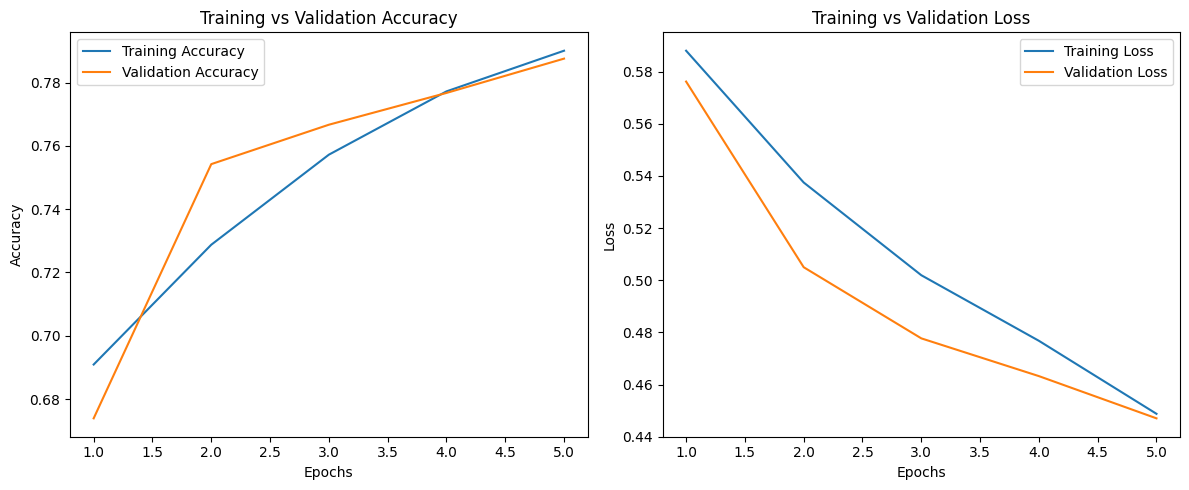

Training Progress:  25%|██▌       | 5/20 [42:27<2:04:40, 498.72s/it]

Epoch 6/20
Epoch 6/20 - Batch 1/1250
Epoch 6/20 - Batch 2/1250
Epoch 6/20 - Batch 3/1250
Epoch 6/20 - Batch 4/1250
Epoch 6/20 - Batch 5/1250
Epoch 6/20 - Batch 6/1250
Epoch 6/20 - Batch 7/1250
Epoch 6/20 - Batch 8/1250
Epoch 6/20 - Batch 9/1250
Epoch 6/20 - Batch 10/1250
Epoch 6/20 - Batch 11/1250
Epoch 6/20 - Batch 12/1250
Epoch 6/20 - Batch 13/1250
Epoch 6/20 - Batch 14/1250
Epoch 6/20 - Batch 15/1250
Epoch 6/20 - Batch 16/1250
Epoch 6/20 - Batch 17/1250
Epoch 6/20 - Batch 18/1250
Epoch 6/20 - Batch 19/1250
Epoch 6/20 - Batch 20/1250
Epoch 6/20 - Batch 21/1250
Epoch 6/20 - Batch 22/1250
Epoch 6/20 - Batch 23/1250
Epoch 6/20 - Batch 24/1250
Epoch 6/20 - Batch 25/1250
Epoch 6/20 - Batch 26/1250
Epoch 6/20 - Batch 27/1250
Epoch 6/20 - Batch 28/1250
Epoch 6/20 - Batch 29/1250
Epoch 6/20 - Batch 30/1250
Epoch 6/20 - Batch 31/1250
Epoch 6/20 - Batch 32/1250
Epoch 6/20 - Batch 33/1250
Epoch 6/20 - Batch 34/1250
Epoch 6/20 - Batch 35/1250
Epoch 6/20 - Batch 36/1250
Epoch 6/20 - Batch 37/1250

Training Progress:  30%|███       | 6/20 [50:36<1:55:35, 495.39s/it]

Epoch 6/20
Training Loss: 0.4246 - Training Accuracy: 0.8047
Validation Loss: 0.4330 - Validation Accuracy: 0.8068

Epoch 7/20
Epoch 7/20 - Batch 1/1250
Epoch 7/20 - Batch 2/1250
Epoch 7/20 - Batch 3/1250
Epoch 7/20 - Batch 4/1250
Epoch 7/20 - Batch 5/1250
Epoch 7/20 - Batch 6/1250
Epoch 7/20 - Batch 7/1250
Epoch 7/20 - Batch 8/1250
Epoch 7/20 - Batch 9/1250
Epoch 7/20 - Batch 10/1250
Epoch 7/20 - Batch 11/1250
Epoch 7/20 - Batch 12/1250
Epoch 7/20 - Batch 13/1250
Epoch 7/20 - Batch 14/1250
Epoch 7/20 - Batch 15/1250
Epoch 7/20 - Batch 16/1250
Epoch 7/20 - Batch 17/1250
Epoch 7/20 - Batch 18/1250
Epoch 7/20 - Batch 19/1250
Epoch 7/20 - Batch 20/1250
Epoch 7/20 - Batch 21/1250
Epoch 7/20 - Batch 22/1250
Epoch 7/20 - Batch 23/1250
Epoch 7/20 - Batch 24/1250
Epoch 7/20 - Batch 25/1250
Epoch 7/20 - Batch 26/1250
Epoch 7/20 - Batch 27/1250
Epoch 7/20 - Batch 28/1250
Epoch 7/20 - Batch 29/1250
Epoch 7/20 - Batch 30/1250
Epoch 7/20 - Batch 31/1250
Epoch 7/20 - Batch 32/1250
Epoch 7/20 - Batch

Training Progress:  35%|███▌      | 7/20 [58:53<1:47:26, 495.92s/it]

Epoch 7/20
Training Loss: 0.4003 - Training Accuracy: 0.8187
Validation Loss: 0.4537 - Validation Accuracy: 0.7936

Epoch 8/20
Epoch 8/20 - Batch 1/1250
Epoch 8/20 - Batch 2/1250
Epoch 8/20 - Batch 3/1250
Epoch 8/20 - Batch 4/1250
Epoch 8/20 - Batch 5/1250
Epoch 8/20 - Batch 6/1250
Epoch 8/20 - Batch 7/1250
Epoch 8/20 - Batch 8/1250
Epoch 8/20 - Batch 9/1250
Epoch 8/20 - Batch 10/1250
Epoch 8/20 - Batch 11/1250
Epoch 8/20 - Batch 12/1250
Epoch 8/20 - Batch 13/1250
Epoch 8/20 - Batch 14/1250
Epoch 8/20 - Batch 15/1250
Epoch 8/20 - Batch 16/1250
Epoch 8/20 - Batch 17/1250
Epoch 8/20 - Batch 18/1250
Epoch 8/20 - Batch 19/1250
Epoch 8/20 - Batch 20/1250
Epoch 8/20 - Batch 21/1250
Epoch 8/20 - Batch 22/1250
Epoch 8/20 - Batch 23/1250
Epoch 8/20 - Batch 24/1250
Epoch 8/20 - Batch 25/1250
Epoch 8/20 - Batch 26/1250
Epoch 8/20 - Batch 27/1250
Epoch 8/20 - Batch 28/1250
Epoch 8/20 - Batch 29/1250
Epoch 8/20 - Batch 30/1250
Epoch 8/20 - Batch 31/1250
Epoch 8/20 - Batch 32/1250
Epoch 8/20 - Batch

Training Progress:  40%|████      | 8/20 [1:07:07<1:39:03, 495.31s/it]

Epoch 8/20
Training Loss: 0.3808 - Training Accuracy: 0.8275
Validation Loss: 0.4818 - Validation Accuracy: 0.7859

Epoch 9/20
Epoch 9/20 - Batch 1/1250
Epoch 9/20 - Batch 2/1250
Epoch 9/20 - Batch 3/1250
Epoch 9/20 - Batch 4/1250
Epoch 9/20 - Batch 5/1250
Epoch 9/20 - Batch 6/1250
Epoch 9/20 - Batch 7/1250
Epoch 9/20 - Batch 8/1250
Epoch 9/20 - Batch 9/1250
Epoch 9/20 - Batch 10/1250
Epoch 9/20 - Batch 11/1250
Epoch 9/20 - Batch 12/1250
Epoch 9/20 - Batch 13/1250
Epoch 9/20 - Batch 14/1250
Epoch 9/20 - Batch 15/1250
Epoch 9/20 - Batch 16/1250
Epoch 9/20 - Batch 17/1250
Epoch 9/20 - Batch 18/1250
Epoch 9/20 - Batch 19/1250
Epoch 9/20 - Batch 20/1250
Epoch 9/20 - Batch 21/1250
Epoch 9/20 - Batch 22/1250
Epoch 9/20 - Batch 23/1250
Epoch 9/20 - Batch 24/1250
Epoch 9/20 - Batch 25/1250
Epoch 9/20 - Batch 26/1250
Epoch 9/20 - Batch 27/1250
Epoch 9/20 - Batch 28/1250
Epoch 9/20 - Batch 29/1250
Epoch 9/20 - Batch 30/1250
Epoch 9/20 - Batch 31/1250
Epoch 9/20 - Batch 32/1250
Epoch 9/20 - Batch

Training Progress:  45%|████▌     | 9/20 [1:15:17<1:30:29, 493.56s/it]

Epoch 9/20
Training Loss: 0.3586 - Training Accuracy: 0.8407
Validation Loss: 0.4286 - Validation Accuracy: 0.8084

Epoch 10/20
Epoch 10/20 - Batch 1/1250
Epoch 10/20 - Batch 2/1250
Epoch 10/20 - Batch 3/1250
Epoch 10/20 - Batch 4/1250
Epoch 10/20 - Batch 5/1250
Epoch 10/20 - Batch 6/1250
Epoch 10/20 - Batch 7/1250
Epoch 10/20 - Batch 8/1250
Epoch 10/20 - Batch 9/1250
Epoch 10/20 - Batch 10/1250
Epoch 10/20 - Batch 11/1250
Epoch 10/20 - Batch 12/1250
Epoch 10/20 - Batch 13/1250
Epoch 10/20 - Batch 14/1250
Epoch 10/20 - Batch 15/1250
Epoch 10/20 - Batch 16/1250
Epoch 10/20 - Batch 17/1250
Epoch 10/20 - Batch 18/1250
Epoch 10/20 - Batch 19/1250
Epoch 10/20 - Batch 20/1250
Epoch 10/20 - Batch 21/1250
Epoch 10/20 - Batch 22/1250
Epoch 10/20 - Batch 23/1250
Epoch 10/20 - Batch 24/1250
Epoch 10/20 - Batch 25/1250
Epoch 10/20 - Batch 26/1250
Epoch 10/20 - Batch 27/1250
Epoch 10/20 - Batch 28/1250
Epoch 10/20 - Batch 29/1250
Epoch 10/20 - Batch 30/1250
Epoch 10/20 - Batch 31/1250
Epoch 10/20 -

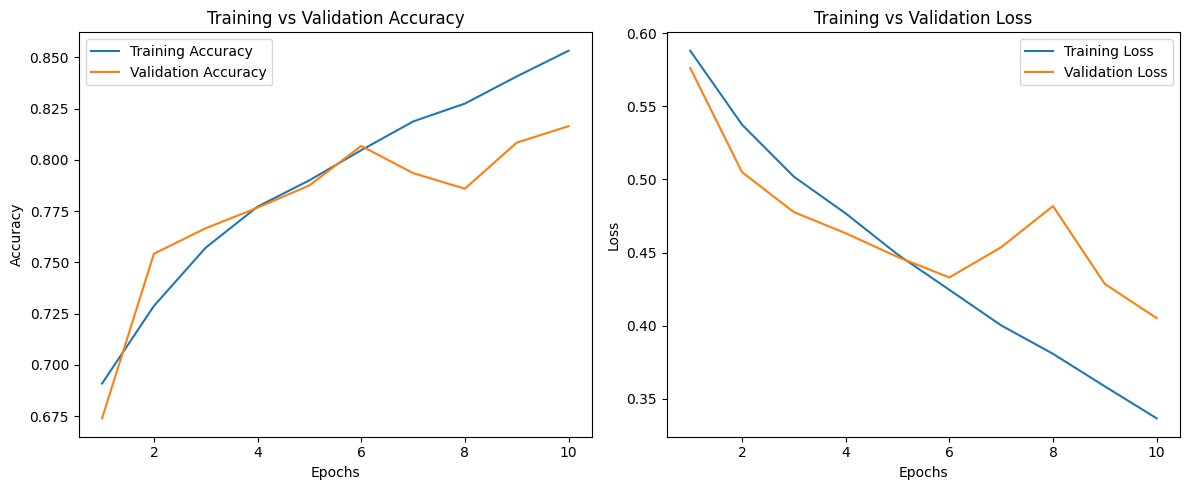

Training Progress:  50%|█████     | 10/20 [1:23:35<1:22:28, 494.89s/it]

Epoch 11/20
Epoch 11/20 - Batch 1/1250
Epoch 11/20 - Batch 2/1250
Epoch 11/20 - Batch 3/1250
Epoch 11/20 - Batch 4/1250
Epoch 11/20 - Batch 5/1250
Epoch 11/20 - Batch 6/1250
Epoch 11/20 - Batch 7/1250
Epoch 11/20 - Batch 8/1250
Epoch 11/20 - Batch 9/1250
Epoch 11/20 - Batch 10/1250
Epoch 11/20 - Batch 11/1250
Epoch 11/20 - Batch 12/1250
Epoch 11/20 - Batch 13/1250
Epoch 11/20 - Batch 14/1250
Epoch 11/20 - Batch 15/1250
Epoch 11/20 - Batch 16/1250
Epoch 11/20 - Batch 17/1250
Epoch 11/20 - Batch 18/1250
Epoch 11/20 - Batch 19/1250
Epoch 11/20 - Batch 20/1250
Epoch 11/20 - Batch 21/1250
Epoch 11/20 - Batch 22/1250
Epoch 11/20 - Batch 23/1250
Epoch 11/20 - Batch 24/1250
Epoch 11/20 - Batch 25/1250
Epoch 11/20 - Batch 26/1250
Epoch 11/20 - Batch 27/1250
Epoch 11/20 - Batch 28/1250
Epoch 11/20 - Batch 29/1250
Epoch 11/20 - Batch 30/1250
Epoch 11/20 - Batch 31/1250
Epoch 11/20 - Batch 32/1250
Epoch 11/20 - Batch 33/1250
Epoch 11/20 - Batch 34/1250
Epoch 11/20 - Batch 35/1250
Epoch 11/20 - Bat

Training Progress:  55%|█████▌    | 11/20 [1:32:01<1:14:44, 498.29s/it]

Epoch 11/20
Training Loss: 0.3172 - Training Accuracy: 0.8639
Validation Loss: 0.4381 - Validation Accuracy: 0.8124

Epoch 12/20
Epoch 12/20 - Batch 1/1250
Epoch 12/20 - Batch 2/1250
Epoch 12/20 - Batch 3/1250
Epoch 12/20 - Batch 4/1250
Epoch 12/20 - Batch 5/1250
Epoch 12/20 - Batch 6/1250
Epoch 12/20 - Batch 7/1250
Epoch 12/20 - Batch 8/1250
Epoch 12/20 - Batch 9/1250
Epoch 12/20 - Batch 10/1250
Epoch 12/20 - Batch 11/1250
Epoch 12/20 - Batch 12/1250
Epoch 12/20 - Batch 13/1250
Epoch 12/20 - Batch 14/1250
Epoch 12/20 - Batch 15/1250
Epoch 12/20 - Batch 16/1250
Epoch 12/20 - Batch 17/1250
Epoch 12/20 - Batch 18/1250
Epoch 12/20 - Batch 19/1250
Epoch 12/20 - Batch 20/1250
Epoch 12/20 - Batch 21/1250
Epoch 12/20 - Batch 22/1250
Epoch 12/20 - Batch 23/1250
Epoch 12/20 - Batch 24/1250
Epoch 12/20 - Batch 25/1250
Epoch 12/20 - Batch 26/1250
Epoch 12/20 - Batch 27/1250
Epoch 12/20 - Batch 28/1250
Epoch 12/20 - Batch 29/1250
Epoch 12/20 - Batch 30/1250
Epoch 12/20 - Batch 31/1250
Epoch 12/20 

Training Progress:  60%|██████    | 12/20 [1:40:28<1:06:46, 500.85s/it]

Epoch 12/20
Training Loss: 0.3001 - Training Accuracy: 0.8704
Validation Loss: 0.4234 - Validation Accuracy: 0.8257

Epoch 13/20
Epoch 13/20 - Batch 1/1250
Epoch 13/20 - Batch 2/1250
Epoch 13/20 - Batch 3/1250
Epoch 13/20 - Batch 4/1250
Epoch 13/20 - Batch 5/1250
Epoch 13/20 - Batch 6/1250
Epoch 13/20 - Batch 7/1250
Epoch 13/20 - Batch 8/1250
Epoch 13/20 - Batch 9/1250
Epoch 13/20 - Batch 10/1250
Epoch 13/20 - Batch 11/1250
Epoch 13/20 - Batch 12/1250
Epoch 13/20 - Batch 13/1250
Epoch 13/20 - Batch 14/1250
Epoch 13/20 - Batch 15/1250
Epoch 13/20 - Batch 16/1250
Epoch 13/20 - Batch 17/1250
Epoch 13/20 - Batch 18/1250
Epoch 13/20 - Batch 19/1250
Epoch 13/20 - Batch 20/1250
Epoch 13/20 - Batch 21/1250
Epoch 13/20 - Batch 22/1250
Epoch 13/20 - Batch 23/1250
Epoch 13/20 - Batch 24/1250
Epoch 13/20 - Batch 25/1250
Epoch 13/20 - Batch 26/1250
Epoch 13/20 - Batch 27/1250
Epoch 13/20 - Batch 28/1250
Epoch 13/20 - Batch 29/1250
Epoch 13/20 - Batch 30/1250
Epoch 13/20 - Batch 31/1250
Epoch 13/20 

Training Progress:  65%|██████▌   | 13/20 [1:48:54<58:38, 502.57s/it]  

Epoch 13/20
Training Loss: 0.2820 - Training Accuracy: 0.8796
Validation Loss: 0.4207 - Validation Accuracy: 0.8233

Epoch 14/20
Epoch 14/20 - Batch 1/1250
Epoch 14/20 - Batch 2/1250
Epoch 14/20 - Batch 3/1250
Epoch 14/20 - Batch 4/1250
Epoch 14/20 - Batch 5/1250
Epoch 14/20 - Batch 6/1250
Epoch 14/20 - Batch 7/1250
Epoch 14/20 - Batch 8/1250
Epoch 14/20 - Batch 9/1250
Epoch 14/20 - Batch 10/1250
Epoch 14/20 - Batch 11/1250
Epoch 14/20 - Batch 12/1250
Epoch 14/20 - Batch 13/1250
Epoch 14/20 - Batch 14/1250
Epoch 14/20 - Batch 15/1250
Epoch 14/20 - Batch 16/1250
Epoch 14/20 - Batch 17/1250
Epoch 14/20 - Batch 18/1250
Epoch 14/20 - Batch 19/1250
Epoch 14/20 - Batch 20/1250
Epoch 14/20 - Batch 21/1250
Epoch 14/20 - Batch 22/1250
Epoch 14/20 - Batch 23/1250
Epoch 14/20 - Batch 24/1250
Epoch 14/20 - Batch 25/1250
Epoch 14/20 - Batch 26/1250
Epoch 14/20 - Batch 27/1250
Epoch 14/20 - Batch 28/1250
Epoch 14/20 - Batch 29/1250
Epoch 14/20 - Batch 30/1250
Epoch 14/20 - Batch 31/1250
Epoch 14/20 

Training Progress:  70%|███████   | 14/20 [1:57:18<50:18, 503.04s/it]

Epoch 14/20
Training Loss: 0.2583 - Training Accuracy: 0.8881
Validation Loss: 0.4209 - Validation Accuracy: 0.8193

Epoch 15/20
Epoch 15/20 - Batch 1/1250
Epoch 15/20 - Batch 2/1250
Epoch 15/20 - Batch 3/1250
Epoch 15/20 - Batch 4/1250
Epoch 15/20 - Batch 5/1250
Epoch 15/20 - Batch 6/1250
Epoch 15/20 - Batch 7/1250
Epoch 15/20 - Batch 8/1250
Epoch 15/20 - Batch 9/1250
Epoch 15/20 - Batch 10/1250
Epoch 15/20 - Batch 11/1250
Epoch 15/20 - Batch 12/1250
Epoch 15/20 - Batch 13/1250
Epoch 15/20 - Batch 14/1250
Epoch 15/20 - Batch 15/1250
Epoch 15/20 - Batch 16/1250
Epoch 15/20 - Batch 17/1250
Epoch 15/20 - Batch 18/1250
Epoch 15/20 - Batch 19/1250
Epoch 15/20 - Batch 20/1250
Epoch 15/20 - Batch 21/1250
Epoch 15/20 - Batch 22/1250
Epoch 15/20 - Batch 23/1250
Epoch 15/20 - Batch 24/1250
Epoch 15/20 - Batch 25/1250
Epoch 15/20 - Batch 26/1250
Epoch 15/20 - Batch 27/1250
Epoch 15/20 - Batch 28/1250
Epoch 15/20 - Batch 29/1250
Epoch 15/20 - Batch 30/1250
Epoch 15/20 - Batch 31/1250
Epoch 15/20 

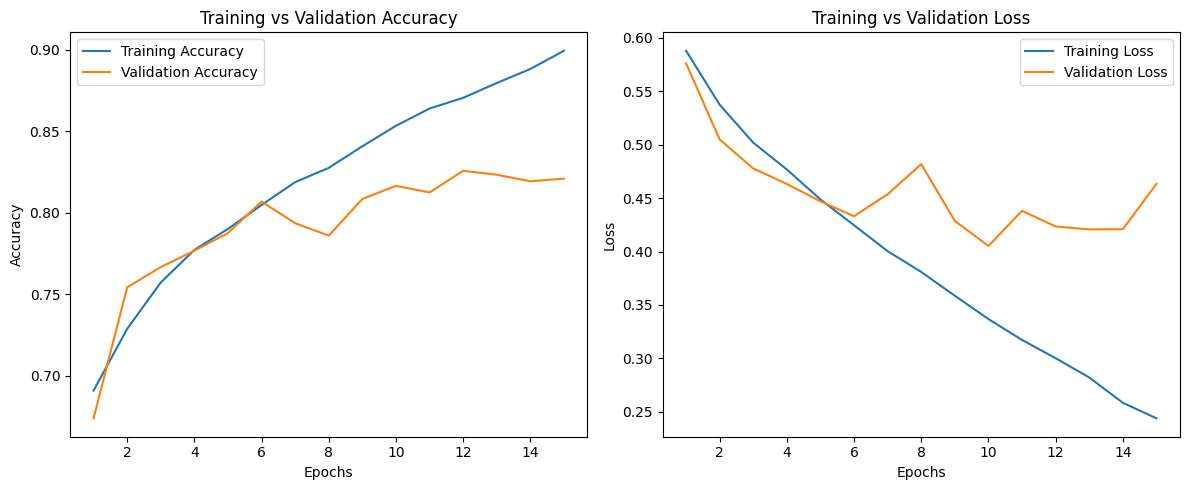

Training Progress:  75%|███████▌  | 15/20 [2:05:37<41:49, 501.87s/it]

Epoch 16/20
Epoch 16/20 - Batch 1/1250
Epoch 16/20 - Batch 2/1250
Epoch 16/20 - Batch 3/1250
Epoch 16/20 - Batch 4/1250
Epoch 16/20 - Batch 5/1250
Epoch 16/20 - Batch 6/1250
Epoch 16/20 - Batch 7/1250
Epoch 16/20 - Batch 8/1250
Epoch 16/20 - Batch 9/1250
Epoch 16/20 - Batch 10/1250
Epoch 16/20 - Batch 11/1250
Epoch 16/20 - Batch 12/1250
Epoch 16/20 - Batch 13/1250
Epoch 16/20 - Batch 14/1250
Epoch 16/20 - Batch 15/1250
Epoch 16/20 - Batch 16/1250
Epoch 16/20 - Batch 17/1250
Epoch 16/20 - Batch 18/1250
Epoch 16/20 - Batch 19/1250
Epoch 16/20 - Batch 20/1250
Epoch 16/20 - Batch 21/1250
Epoch 16/20 - Batch 22/1250
Epoch 16/20 - Batch 23/1250
Epoch 16/20 - Batch 24/1250
Epoch 16/20 - Batch 25/1250
Epoch 16/20 - Batch 26/1250
Epoch 16/20 - Batch 27/1250
Epoch 16/20 - Batch 28/1250
Epoch 16/20 - Batch 29/1250
Epoch 16/20 - Batch 30/1250
Epoch 16/20 - Batch 31/1250
Epoch 16/20 - Batch 32/1250
Epoch 16/20 - Batch 33/1250
Epoch 16/20 - Batch 34/1250
Epoch 16/20 - Batch 35/1250
Epoch 16/20 - Bat

Training Progress:  80%|████████  | 16/20 [2:14:03<33:32, 503.12s/it]

Epoch 16/20
Training Loss: 0.2281 - Training Accuracy: 0.9050
Validation Loss: 0.4533 - Validation Accuracy: 0.8129

Epoch 17/20
Epoch 17/20 - Batch 1/1250
Epoch 17/20 - Batch 2/1250
Epoch 17/20 - Batch 3/1250
Epoch 17/20 - Batch 4/1250
Epoch 17/20 - Batch 5/1250
Epoch 17/20 - Batch 6/1250
Epoch 17/20 - Batch 7/1250
Epoch 17/20 - Batch 8/1250
Epoch 17/20 - Batch 9/1250
Epoch 17/20 - Batch 10/1250
Epoch 17/20 - Batch 11/1250
Epoch 17/20 - Batch 12/1250
Epoch 17/20 - Batch 13/1250
Epoch 17/20 - Batch 14/1250
Epoch 17/20 - Batch 15/1250
Epoch 17/20 - Batch 16/1250
Epoch 17/20 - Batch 17/1250
Epoch 17/20 - Batch 18/1250
Epoch 17/20 - Batch 19/1250
Epoch 17/20 - Batch 20/1250
Epoch 17/20 - Batch 21/1250
Epoch 17/20 - Batch 22/1250
Epoch 17/20 - Batch 23/1250
Epoch 17/20 - Batch 24/1250
Epoch 17/20 - Batch 25/1250
Epoch 17/20 - Batch 26/1250
Epoch 17/20 - Batch 27/1250
Epoch 17/20 - Batch 28/1250
Epoch 17/20 - Batch 29/1250
Epoch 17/20 - Batch 30/1250
Epoch 17/20 - Batch 31/1250
Epoch 17/20 

Training Progress:  85%|████████▌ | 17/20 [2:22:30<25:12, 504.29s/it]

Epoch 17/20
Training Loss: 0.2180 - Training Accuracy: 0.9074
Validation Loss: 0.4935 - Validation Accuracy: 0.8265

Epoch 18/20
Epoch 18/20 - Batch 1/1250
Epoch 18/20 - Batch 2/1250
Epoch 18/20 - Batch 3/1250
Epoch 18/20 - Batch 4/1250
Epoch 18/20 - Batch 5/1250
Epoch 18/20 - Batch 6/1250
Epoch 18/20 - Batch 7/1250
Epoch 18/20 - Batch 8/1250
Epoch 18/20 - Batch 9/1250
Epoch 18/20 - Batch 10/1250
Epoch 18/20 - Batch 11/1250
Epoch 18/20 - Batch 12/1250
Epoch 18/20 - Batch 13/1250
Epoch 18/20 - Batch 14/1250
Epoch 18/20 - Batch 15/1250
Epoch 18/20 - Batch 16/1250
Epoch 18/20 - Batch 17/1250
Epoch 18/20 - Batch 18/1250
Epoch 18/20 - Batch 19/1250
Epoch 18/20 - Batch 20/1250
Epoch 18/20 - Batch 21/1250
Epoch 18/20 - Batch 22/1250
Epoch 18/20 - Batch 23/1250
Epoch 18/20 - Batch 24/1250
Epoch 18/20 - Batch 25/1250
Epoch 18/20 - Batch 26/1250
Epoch 18/20 - Batch 27/1250
Epoch 18/20 - Batch 28/1250
Epoch 18/20 - Batch 29/1250
Epoch 18/20 - Batch 30/1250
Epoch 18/20 - Batch 31/1250
Epoch 18/20 

Training Progress:  90%|█████████ | 18/20 [2:30:58<16:50, 505.12s/it]

Epoch 18/20
Training Loss: 0.2048 - Training Accuracy: 0.9147
Validation Loss: 0.4671 - Validation Accuracy: 0.8273

Epoch 19/20
Epoch 19/20 - Batch 1/1250
Epoch 19/20 - Batch 2/1250
Epoch 19/20 - Batch 3/1250
Epoch 19/20 - Batch 4/1250
Epoch 19/20 - Batch 5/1250
Epoch 19/20 - Batch 6/1250
Epoch 19/20 - Batch 7/1250
Epoch 19/20 - Batch 8/1250
Epoch 19/20 - Batch 9/1250
Epoch 19/20 - Batch 10/1250
Epoch 19/20 - Batch 11/1250
Epoch 19/20 - Batch 12/1250
Epoch 19/20 - Batch 13/1250
Epoch 19/20 - Batch 14/1250
Epoch 19/20 - Batch 15/1250
Epoch 19/20 - Batch 16/1250
Epoch 19/20 - Batch 17/1250
Epoch 19/20 - Batch 18/1250
Epoch 19/20 - Batch 19/1250
Epoch 19/20 - Batch 20/1250
Epoch 19/20 - Batch 21/1250
Epoch 19/20 - Batch 22/1250
Epoch 19/20 - Batch 23/1250
Epoch 19/20 - Batch 24/1250
Epoch 19/20 - Batch 25/1250
Epoch 19/20 - Batch 26/1250
Epoch 19/20 - Batch 27/1250
Epoch 19/20 - Batch 28/1250
Epoch 19/20 - Batch 29/1250
Epoch 19/20 - Batch 30/1250
Epoch 19/20 - Batch 31/1250
Epoch 19/20 

Training Progress:  95%|█████████▌| 19/20 [2:39:27<08:26, 506.41s/it]

Epoch 19/20
Training Loss: 0.1976 - Training Accuracy: 0.9170
Validation Loss: 0.4956 - Validation Accuracy: 0.8245

Epoch 20/20
Epoch 20/20 - Batch 1/1250
Epoch 20/20 - Batch 2/1250
Epoch 20/20 - Batch 3/1250
Epoch 20/20 - Batch 4/1250
Epoch 20/20 - Batch 5/1250
Epoch 20/20 - Batch 6/1250
Epoch 20/20 - Batch 7/1250
Epoch 20/20 - Batch 8/1250
Epoch 20/20 - Batch 9/1250
Epoch 20/20 - Batch 10/1250
Epoch 20/20 - Batch 11/1250
Epoch 20/20 - Batch 12/1250
Epoch 20/20 - Batch 13/1250
Epoch 20/20 - Batch 14/1250
Epoch 20/20 - Batch 15/1250
Epoch 20/20 - Batch 16/1250
Epoch 20/20 - Batch 17/1250
Epoch 20/20 - Batch 18/1250
Epoch 20/20 - Batch 19/1250
Epoch 20/20 - Batch 20/1250
Epoch 20/20 - Batch 21/1250
Epoch 20/20 - Batch 22/1250
Epoch 20/20 - Batch 23/1250
Epoch 20/20 - Batch 24/1250
Epoch 20/20 - Batch 25/1250
Epoch 20/20 - Batch 26/1250
Epoch 20/20 - Batch 27/1250
Epoch 20/20 - Batch 28/1250
Epoch 20/20 - Batch 29/1250
Epoch 20/20 - Batch 30/1250
Epoch 20/20 - Batch 31/1250
Epoch 20/20 

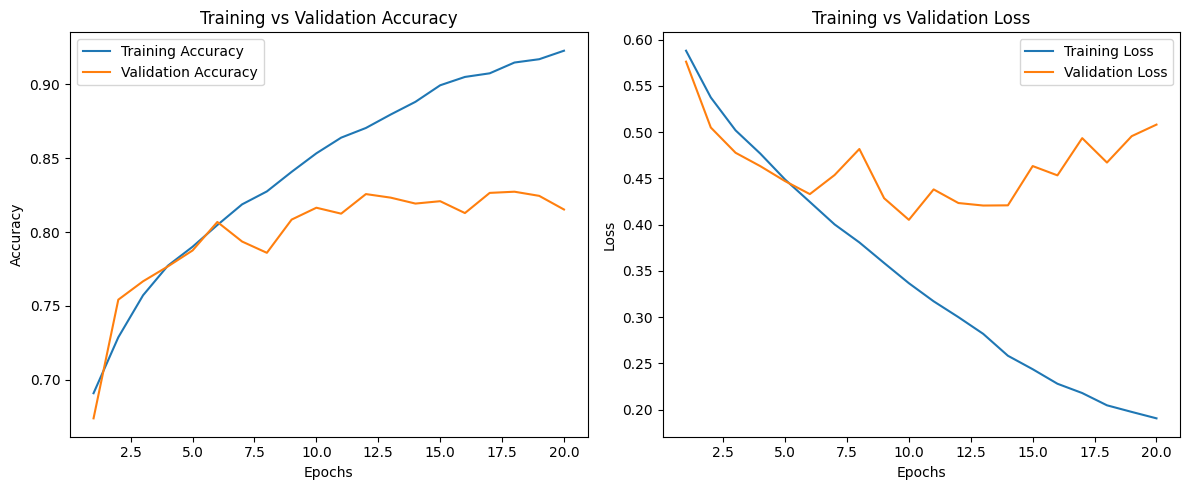

Training Progress: 100%|██████████| 20/20 [2:47:55<00:00, 503.76s/it]


In [ ]:
# loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.to(device)
# loop
num_epochs = 20
train_loss_list = []
train_accuracy_list = []
val_loss_list = []
val_accuracy_list = []

num_train_steps = len(train_dataloader.dataset) // batch_size

# calculate the number of validation steps
num_val_steps = len(val_dataloader.dataset) // batch_size

for epoch in tqdm(range(num_epochs), desc = 'Training Progress'):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    print(f"Epoch {epoch + 1}/{num_epochs}")


    for batch_idx, (images, labels) in enumerate(train_dataloader):
        print(f"Epoch {epoch + 1}/{num_epochs} - Batch {batch_idx + 1}/{len(train_dataloader)}")


        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        # forward pass
        outputs = model(images)

        # compute loss
        loss = criterion(outputs, labels.float().view(-1, 1))

        # backpropagation and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # compute training accuracy
        predicted_labels = (outputs >= 0.5).float()
        correct_predictions += (predicted_labels == labels.view(-1, 1)).sum().item()
        total_samples += len(labels)

    # calculate average loss and accuracy for this epoch
    epoch_loss = running_loss / len(train_dataloader)
    epoch_accuracy = correct_predictions / total_samples

    # store values
    train_loss_list.append(epoch_loss)
    train_accuracy_list.append(epoch_accuracy)

    model.eval()
    val_running_loss = 0.0
    val_correct_predictions = 0
    val_total_samples = 0

    with torch.no_grad():
        for batch_idx, (val_images, val_labels) in enumerate(val_dataloader):

            val_images, val_labels = val_images.to(device), val_labels.to(device)

            # forward pass
            val_outputs = model(val_images)

            # compute validation loss
            val_loss = criterion(val_outputs, val_labels.float().view(-1, 1))
            val_running_loss += val_loss.item()

            # compute validation accuracy
            val_predicted_labels = (val_outputs >= 0.5).float()
            val_correct_predictions += (val_predicted_labels == val_labels.view(-1, 1)).sum().item()
            val_total_samples += len(val_labels)

    # calculate validation loss and accuracy for epoch
    val_epoch_loss = val_running_loss / len(val_dataloader)
    val_epoch_accuracy = val_correct_predictions / val_total_samples

    # store values
    val_loss_list.append(val_epoch_loss)
    val_accuracy_list.append(val_epoch_accuracy)

    # print training and validation loss and accuracy for epoch
    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Training Loss: {epoch_loss:.4f} - Training Accuracy: {epoch_accuracy:.4f}")
    print(f"Validation Loss: {val_epoch_loss:.4f} - Validation Accuracy: {val_epoch_accuracy:.4f}\n")

    if (epoch + 1) % 5 == 0 or epoch == num_epochs - 1:
        plt.figure(figsize=(12, 5))

        # accuracy plot
        plt.subplot(1, 2, 1)
        plt.plot(range(1, epoch + 2), train_accuracy_list, label='Training Accuracy')
        plt.plot(range(1, epoch + 2), val_accuracy_list, label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Training vs Validation Accuracy')
        plt.legend()

        # loss plot
        plt.subplot(1, 2, 2)
        plt.plot(range(1, epoch + 2), train_loss_list, label='Training Loss')
        plt.plot(range(1, epoch + 2), val_loss_list, label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training vs Validation Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()



In [ ]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong


In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


In [ ]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong


In [ ]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong


Plot the graphs:

- Loss(Number of epochs)

- Accuracy(Number of epochs)

Let's try to improve the quality of recognition, using the method of transfer lerning.

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [ ]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [ ]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

1/1 [==============================] - 0s 76ms/step - loss: 3.2258 - accuracy: 0.0000e+00
Epoch 1/20 - Test Accuracy: 0.0
1/1 [==============================] - 0s 73ms/step - loss: 0.0618 - accuracy: 1.0000
Epoch 2/20 - Test Accuracy: 1.0
1/1 [==============================] - 0s 71ms/step - loss: 0.1061 - accuracy: 1.0000
Epoch 3/20 - Test Accuracy: 1.0
1/1 [==============================] - 0s 87ms/step - loss: 0.4674 - accuracy: 0.7500
Epoch 4/20 - Test Accuracy: 0.75
1/1 [==============================] - 0s 90ms/step - loss: 1.0434 - accuracy: 0.5000
Epoch 5/20 - Test Accuracy: 0.5


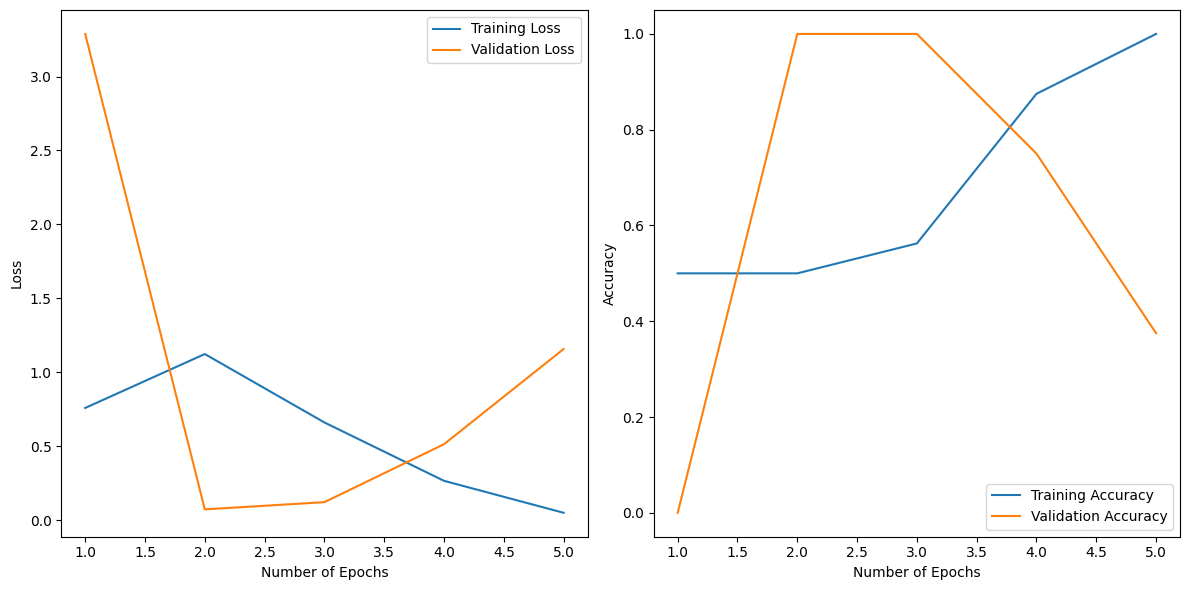

1/1 [==============================] - 0s 89ms/step - loss: 1.1992 - accuracy: 0.5000
Epoch 6/20 - Test Accuracy: 0.5
1/1 [==============================] - 0s 97ms/step - loss: 0.9505 - accuracy: 0.5625
Epoch 7/20 - Test Accuracy: 0.5625
1/1 [==============================] - 0s 90ms/step - loss: 0.6570 - accuracy: 0.6250
Epoch 8/20 - Test Accuracy: 0.625
1/1 [==============================] - 0s 87ms/step - loss: 0.4214 - accuracy: 0.6875
Epoch 9/20 - Test Accuracy: 0.6875
1/1 [==============================] - 0s 75ms/step - loss: 0.2529 - accuracy: 0.8125
Epoch 10/20 - Test Accuracy: 0.8125


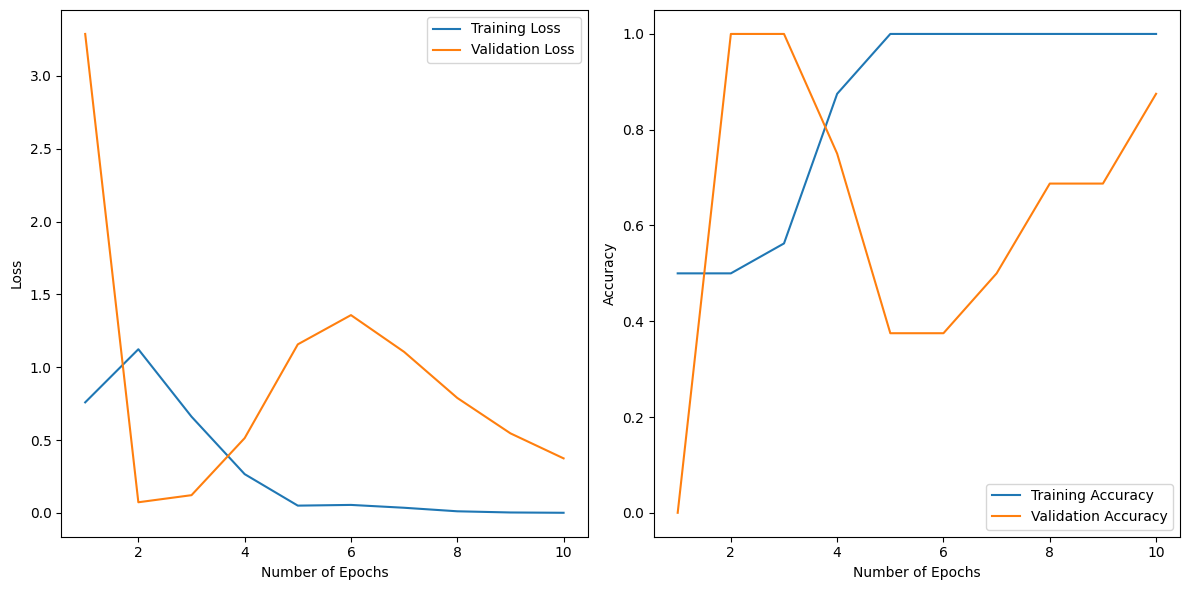

1/1 [==============================] - 0s 73ms/step - loss: 0.1452 - accuracy: 1.0000
Epoch 11/20 - Test Accuracy: 1.0
1/1 [==============================] - 0s 73ms/step - loss: 0.0823 - accuracy: 1.0000
Epoch 12/20 - Test Accuracy: 1.0
1/1 [==============================] - 0s 73ms/step - loss: 0.0479 - accuracy: 1.0000
Epoch 13/20 - Test Accuracy: 1.0
1/1 [==============================] - 0s 77ms/step - loss: 0.0294 - accuracy: 1.0000
Epoch 14/20 - Test Accuracy: 1.0
1/1 [==============================] - 0s 74ms/step - loss: 0.0192 - accuracy: 1.0000
Epoch 15/20 - Test Accuracy: 1.0


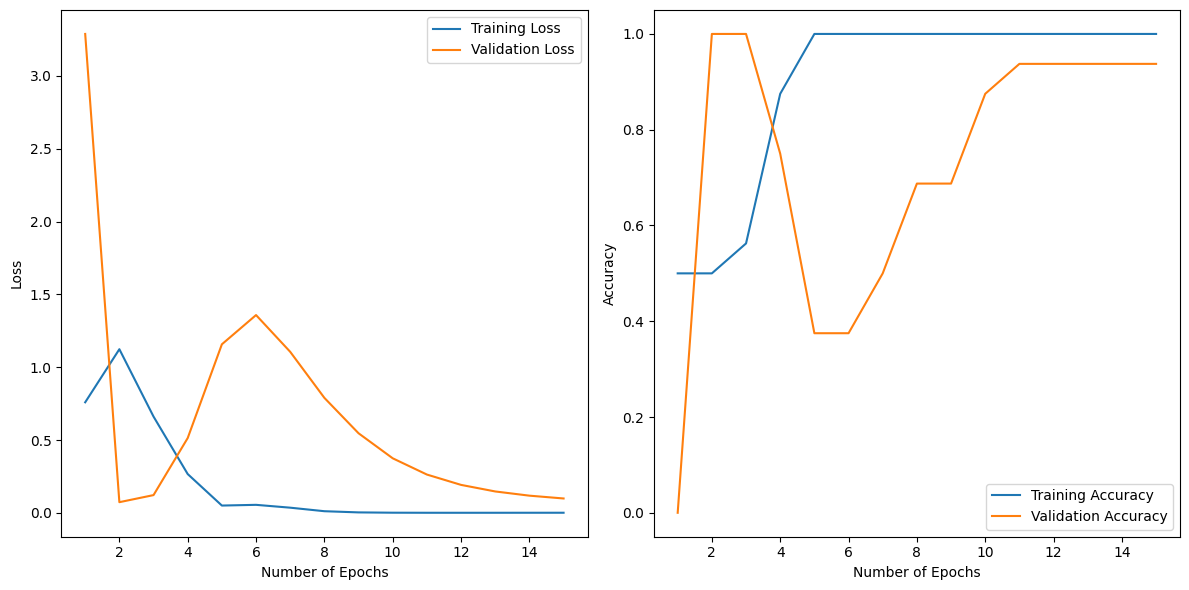

1/1 [==============================] - 0s 75ms/step - loss: 0.0135 - accuracy: 1.0000
Epoch 16/20 - Test Accuracy: 1.0
1/1 [==============================] - 0s 76ms/step - loss: 0.0103 - accuracy: 1.0000
Epoch 17/20 - Test Accuracy: 1.0
1/1 [==============================] - 0s 74ms/step - loss: 0.0083 - accuracy: 1.0000
Epoch 18/20 - Test Accuracy: 1.0
1/1 [==============================] - 0s 74ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 19/20 - Test Accuracy: 1.0
1/1 [==============================] - 0s 85ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 20/20 - Test Accuracy: 1.0


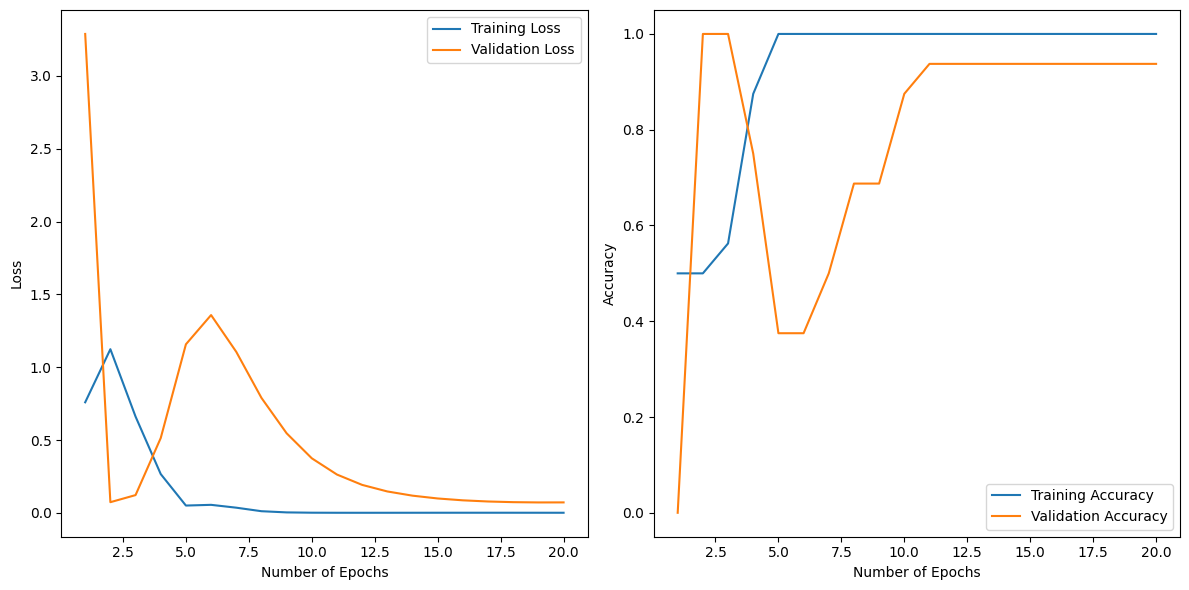

1/1 [==============================] - 0s 82ms/step - loss: 0.0066 - accuracy: 1.0000
Final Test Loss: 0.006574208382517099
Final Test Accuracy: 1.0


In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader


# VGG16 model
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, channels))
for layer in base_model.layers:
    layer.trainable = False

# fully connected layers
x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
num_classes = 2
predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

# transfer learning model
transfer_model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

# compile model
transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# pytorch to tensorflow
train_data, train_labels = next(iter(train_dataloader))
val_data, val_labels = next(iter(val_dataloader))
test_data, test_labels = next(iter(test_dataloader))

train_data_tf = tf.convert_to_tensor(np.transpose(train_data.numpy(), (0, 2, 3, 1)), dtype=tf.float32)
val_data_tf = tf.convert_to_tensor(np.transpose(val_data.numpy(), (0, 2, 3, 1)), dtype=tf.float32)
test_data_tf = tf.convert_to_tensor(np.transpose(test_data.numpy(), (0, 2, 3, 1)), dtype=tf.float32)

num_classes = 2
train_labels_tf = tf.one_hot(train_labels, num_classes, dtype=tf.float32)
val_labels_tf = tf.one_hot(val_labels, num_classes, dtype=tf.float32)
test_labels_tf = tf.one_hot(test_labels, num_classes, dtype=tf.float32)


# train
num_epochs = 20
history = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}

for epoch in range(num_epochs):
    history_epoch = transfer_model.fit(
        train_data_tf,
        train_labels_tf,
        epochs=1,
        batch_size=batch_size,
        validation_data=(val_data_tf, val_labels_tf),
        verbose=0
    )

    # evaluate on test data after each epoch
    test_loss, test_accuracy = transfer_model.evaluate(test_data_tf, test_labels_tf)
    print(f"Epoch {epoch + 1}/{num_epochs} - Test Accuracy: {test_accuracy}")

    # append results
    history['loss'].append(history_epoch.history['loss'][0])
    history['accuracy'].append(history_epoch.history['accuracy'][0])
    history['val_loss'].append(history_epoch.history['val_loss'][0])
    history['val_accuracy'].append(history_epoch.history['val_accuracy'][0])

    # every 5 epochs
    if epoch % 5 == 4:
        # Plot the graphs
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(range(1, epoch + 2), history['loss'][:epoch + 1], label='Training Loss')
        plt.plot(range(1, epoch + 2), history['val_loss'][:epoch + 1], label='Validation Loss')
        plt.xlabel('Number of Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(range(1, epoch + 2), history['accuracy'][:epoch + 1], label='Training Accuracy')
        plt.plot(range(1, epoch + 2), history['val_accuracy'][:epoch + 1], label='Validation Accuracy')
        plt.xlabel('Number of Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

test_loss, test_accuracy = transfer_model.evaluate(test_data_tf, test_labels_tf)
print(f"Final Test Loss: {test_loss}")
print(f"Final Test Accuracy: {test_accuracy}")


# Save and Showcase how good is your model